### Figure 4 for Siddiqui et al 

In [1]:
import oceanspy as ospy
import xarray as xr
import matplotlib.pyplot as plt 
import cmocean
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import ecco_v4_py as ecco

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (18, 6),
         'axes.labelsize': '28',
         'axes.titlesize':'28',
         'xtick.labelsize':'28',
         'ytick.labelsize':'28'}
pylab.rcParams.update(params)

In [3]:
from matplotlib.patches import Polygon
%matplotlib inline

import warnings

import matplotlib.path                 as mpath
import cartopy.crs                     as ccrs
import cartopy.mpl.ticker              as ctk
import cartopy.feature as cfeature
import cartopy.mpl.patch as cpatch
import matplotlib as mpl

In [4]:
pylab.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})

In [5]:
ecco_sal = xr.open_dataset('/home/idies/workspace/Storage/asiddi24/persistent/SciServer/Chapter_1/Siddiqui_etal_JGR_2023/data/ecco_sal_annual_anom_1000.nc')
ecco_sal

<xarray.Dataset>
Dimensions:                (k_p1: 51, j_g: 90, i_g: 90, k: 30, j: 90, k_u: 50,
                            i: 90, k_l: 50, tile: 13, time: 312, nv: 2, year: 26)
Coordinates: (12/42)
  * k_p1                   (k_p1) int64 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
  * j_g                    (j_g) int64 0 1 2 3 4 5 6 7 ... 83 84 85 86 87 88 89
  * i_g                    (i_g) int64 0 1 2 3 4 5 6 7 ... 83 84 85 86 87 88 89
  * k                      (k) int64 0 1 2 3 4 5 6 7 ... 22 23 24 25 26 27 28 29
  * j                      (j) int64 0 1 2 3 4 5 6 7 ... 82 83 84 85 86 87 88 89
  * k_u                    (k_u) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49
    ...                     ...
    maskC                  (k, tile, j, i) bool ...
    maskS                  (k, tile, j_g, i) bool ...
    timestep               (time) int64 ...
    time_bnds              (time, nv) datetime64[ns] ...
    month                  (time) int64 ...
  * year                   (year) int64 1992 1993 1994 1995 ... 2015 2016 2017
Dimensions without coordinates: time, nv
Data variables:
    salt_anom_1000_annual  (year, tile, j, i) float64 ...
Attributes:
    date_created:  Mon Dec 30 11:13:26 2019
    title:         ECCOv4 MITgcm grid information

In [6]:
ecco_sal = ecco_sal.sel(year=[1992,1993,1994,1995,1996,1997, 2012, 2013, 2014, 2015, 2016, 2017])
ecco_sal

<xarray.Dataset>
Dimensions:                (k_p1: 51, j_g: 90, i_g: 90, k: 30, j: 90, k_u: 50,
                            i: 90, k_l: 50, tile: 13, time: 312, nv: 2, year: 12)
Coordinates: (12/42)
  * k_p1                   (k_p1) int64 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
  * j_g                    (j_g) int64 0 1 2 3 4 5 6 7 ... 83 84 85 86 87 88 89
  * i_g                    (i_g) int64 0 1 2 3 4 5 6 7 ... 83 84 85 86 87 88 89
  * k                      (k) int64 0 1 2 3 4 5 6 7 ... 22 23 24 25 26 27 28 29
  * j                      (j) int64 0 1 2 3 4 5 6 7 ... 82 83 84 85 86 87 88 89
  * k_u                    (k_u) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49
    ...                     ...
    maskC                  (k, tile, j, i) bool ...
    maskS                  (k, tile, j_g, i) bool ...
    timestep               (time) int64 ...
    time_bnds              (time, nv) datetime64[ns] ...
    month                  (time) int64 ...
  * year                   (year) int64 1992 1993 1994 1995 ... 2015 2016 2017
Dimensions without coordinates: time, nv
Data variables:
    salt_anom_1000_annual  (year, tile, j, i) float64 ...
Attributes:
    date_created:  Mon Dec 30 11:13:26 2019
    title:         ECCOv4 MITgcm grid information

In [7]:
grid = xr.open_dataset('/home/idies/workspace/Storage/asiddi24/persistent/SciServer/Chapter_1/Siddiqui_etal_JGR_2023/data/ETOPO/ETOPO1_Ice_g_gmt4.grd', decode_cf=True, engine='netcdf4')

In [8]:
grid

<xarray.Dataset>
Dimensions:  (x: 21601, y: 10801)
Coordinates:
  * x        (x) float64 -180.0 -180.0 -180.0 -179.9 ... 179.9 180.0 180.0 180.0
  * y        (y) float64 -90.0 -89.98 -89.97 -89.95 ... 89.95 89.97 89.98 90.0
Data variables:
    z        (y, x) float64 ...
Attributes:
    Conventions:  COARDS/CF-1.0
    title:        ETOPO1_Ice_g_gmt4.grd
    GMT_version:  4.4.0
    node_offset:  0

In [9]:
grid=grid.sel(y=slice(0,90), x=slice(-120,50)).where(grid.z>0).load()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

def plot_examples(colormaps):
    """
    Helper function to plot data with associated colormap.
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
                            constrained_layout=True, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()


/tmp/ipykernel_3559/1075132830.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('gray', 256)
/tmp/ipykernel_3559/1075132830.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis_big = cm.get_cmap('gray')


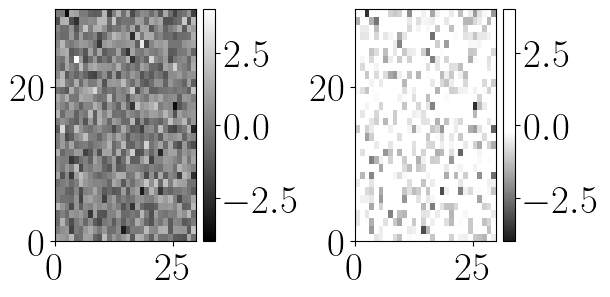

In [11]:
viridis = cm.get_cmap('gray', 256)
viridis_big = cm.get_cmap('gray')
newcmp = ListedColormap(viridis_big(np.linspace(0.1,2, 256)))
plot_examples([viridis, newcmp])

In [12]:
import cartopy.feature as cfeature
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='black')


In [13]:
ecco_sal = ecco_sal.load()
ecco_sal.nbytes*1e-9

0.06382768400000001

In [14]:
# %%time
# fig = plt.subplots(figsize=(30,12), frameon=True)
# for i,year in enumerate(ecco_sal.salt_anom_200_annual.sel(year=[1993,1994]).year):

#     with warnings.catch_warnings():
#         warnings.simplefilter('ignore')
#         fig,ax,p,cbar,*_=ecco.plot_proj_to_latlon_grid(ecco_sal.salt_anom_200_annual.XC,ecco_sal.salt_anom_200_annual.YC,
#                                                        ecco_sal.salt_anom_200_annual.sel(year=year),
#                                                                  show_colorbar=False,
#                                                                  projection_type='LambertConformal',
#                                                                  show_grid_lines = False,
#                                                                  user_lon_0=-40, 
#                                                                  lat_lim = 20,
#                                                                  show_land=False, show_land_over_data = False,
#                                                                  subplot_grid=[3,10,i+3],
#                                                                  cmap='cmo.balance',cmin=-0.2,cmax=0.2);
#         ax.set_title(year.values)   

    
    
    
#     lon1, lon2, lat1, lat2 = [-100, 20, 0, 85]

#     rect = mpath.Path([[lon1, lat1], [lon2, lat1],
#         [lon2, lat2], [lon1, lat2], [lon1, lat1]], closed=True).interpolated(150)

#     name='LambertConformal'
#     proj=ccrs.LambertConformal(central_longitude=(lon1+lon2)*0.5,
#         central_latitude=(lat1+lat2)*0.5)


#     proj_to_data = ccrs.PlateCarree()._as_mpl_transform(ax) - ax.transData
#     rect_in_target = proj_to_data.transform_path(rect)

#     ax.set_boundary(rect_in_target)
#     ax.set_xlim(rect_in_target.vertices[:,0].min(), rect_in_target.vertices[:,0].max())
#     ax.set_ylim(rect_in_target.vertices[:,1].min(), rect_in_target.vertices[:,1].max())
#     ax.coastlines()
    
#      # Adding etopop
#     ax.pcolormesh(grid.x, grid.y, grid.z, transform=ccrs.PlateCarree(), cmap=newcmp, zorder=75)
    
#     ax.patch.set_edgecolor('black')  
#     ax.patch.set_linewidth('2')  
#     #ax.add_feature(land_50m, zorder=75) 


#     gl=ax.gridlines(draw_labels=True, x_inline=False, y_inline=False, linestyle='dashed')
#     gl.top_labels=False
#     gl.right_labels=False
#     gl.bottom_labels=False
#     gl.rotate_labels=False
#     gl.xlocator=ctk.LongitudeLocator(2)
#     gl.ylocator=ctk.LatitudeLocator(6)
#     gl.xformatter=ctk.LongitudeFormatter(zero_direction_label=True)
#     gl.yformatter=ctk.LatitudeFormatter()
#     #gl.xlabel_style = {'size': 12, 'color': 'red', 'ha':'right', 'va':'top' ,'rotation':'10'}
#     gl.ylabel_style = {'size': 12, 'color': 'black', 'va': 'bottom', 'ha':'right'}

# # Adjust the location of the subplots on the page to make room for the colorbar
# fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
#                     wspace=0.1, hspace=0.2)  

# # Add a colorbar axis at the bottom of the graph
# cbar_ax = fig.add_axes([0.31, 0.2, 0.4, 0.02])

# # Draw the colorbar
# cbar=fig.colorbar(p, cax=cbar_ax,orientation='horizontal', ticks=np.linspace(-0.2,0.2,11), extend='both')
# plt.figtext(0.504,0.14, '[psu]', fontsize=20)

    
# plt.savefig('figs/ecco_sal_annual_maps.png', format='png', bbox_inches='tight', facecolor='w',dpi=300)    

CPU times: user 7min 10s, sys: 54.5 s, total: 8min 5s
Wall time: 7min 47s


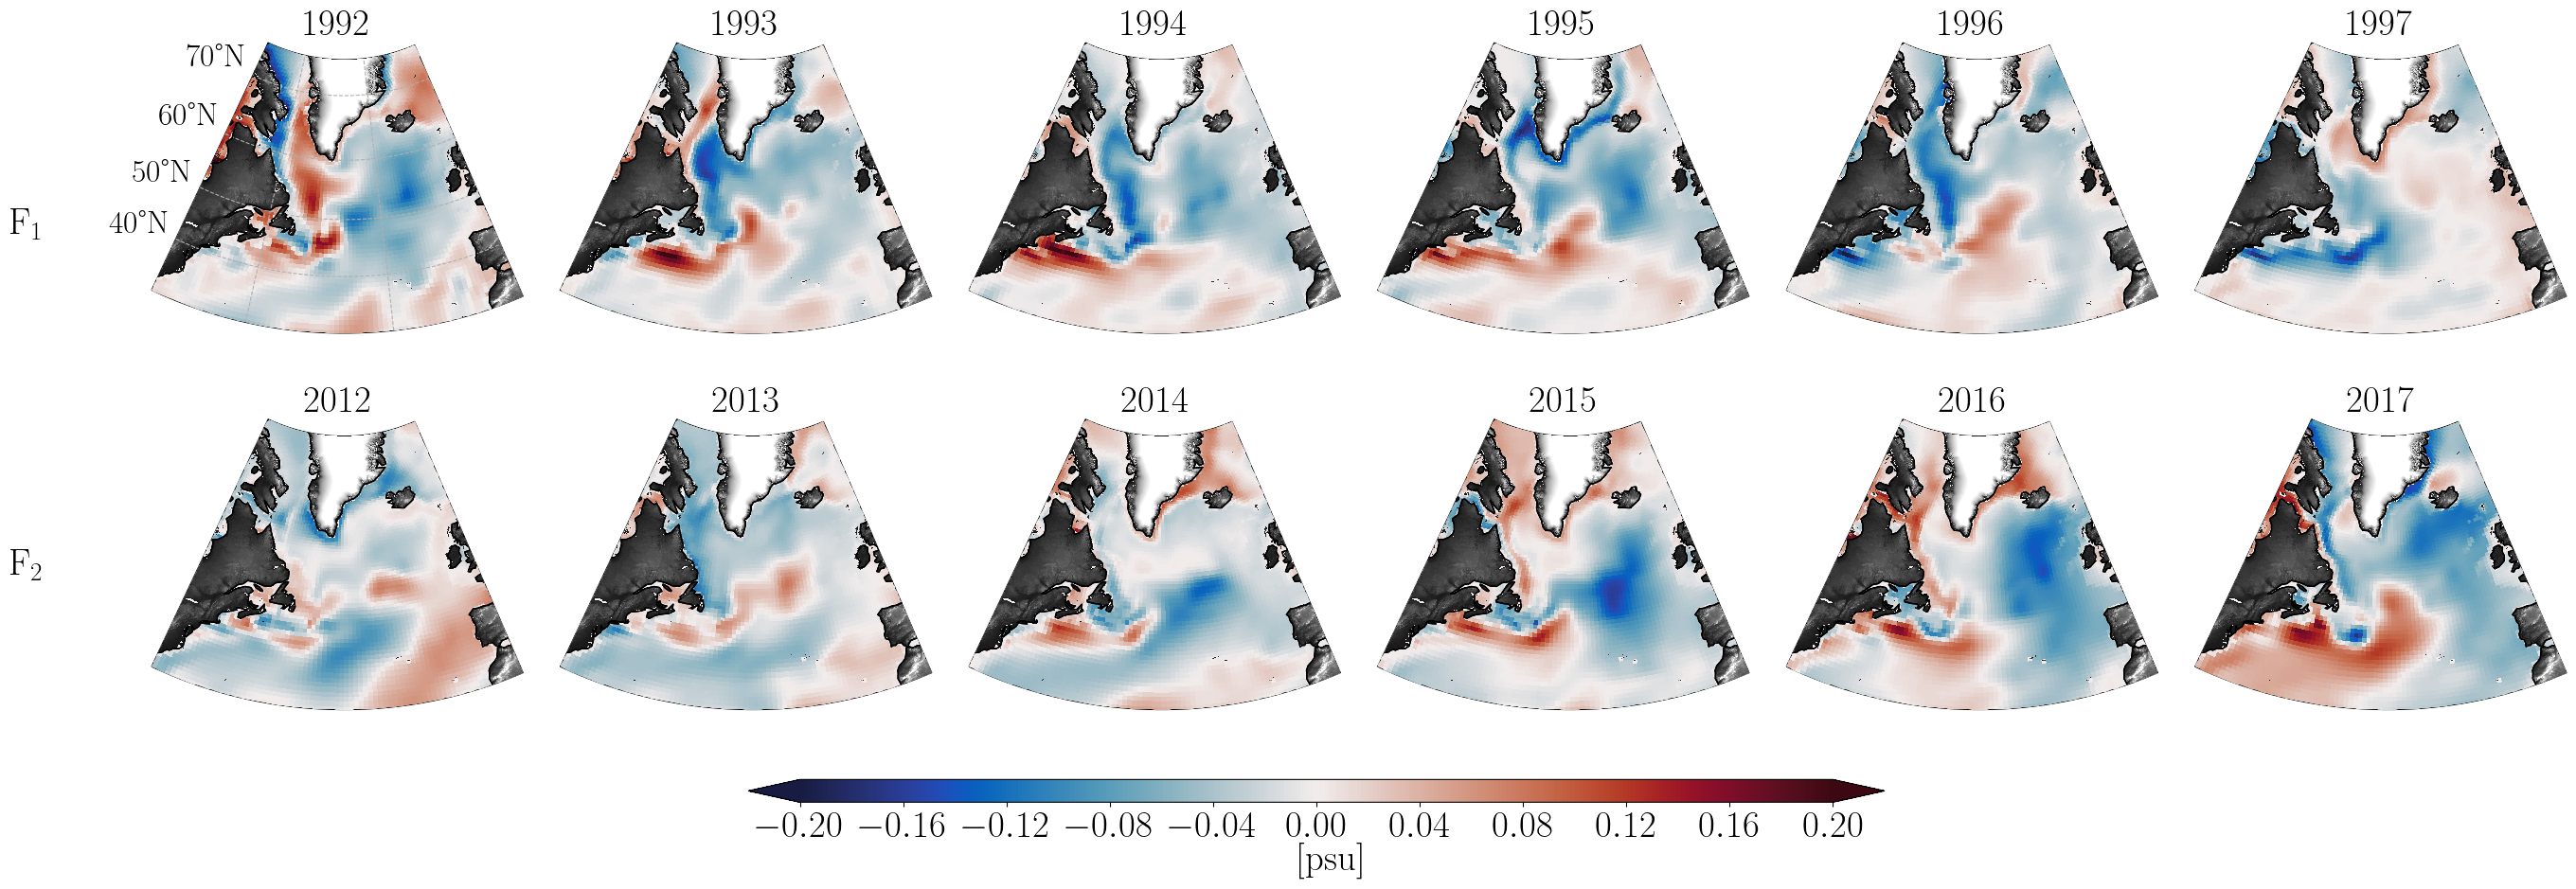

In [15]:
%%time

pylab.rcParams.update({
  "text.usetex": True})
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']


fig = plt.subplots(figsize=(30,12), frameon=True)
for i,year in enumerate(ecco_sal['salt_anom_1000_annual'].year):
        
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        fig,ax,p,cbar,*_=ecco.plot_proj_to_latlon_grid(ecco_sal.XC,ecco_sal.YC,
                                                       ecco_sal['salt_anom_1000_annual'].sel(year=year),
                                                                 show_colorbar=False,
                                                                 projection_type='LambertConformal',
                                                                 show_grid_lines = False,
                                                                 user_lon_0=-40, 
                                                                 lat_lim = 20,
                                                                 show_land=False, show_land_over_data = False,
                                                                 subplot_grid=[2,6,i+1],
                                                                 cmap='cmo.balance',cmin=-0.2,cmax=0.2);
        ax.set_title(year.values)   




    lon1, lon2, lat1, lat2 = [-80, -3, 30, 75]

    rect = mpath.Path([[lon1, lat1], [lon2, lat1],
        [lon2, lat2], [lon1, lat2], [lon1, lat1]], closed=True).interpolated(150)

    name='LambertConformal'
    proj=ccrs.LambertConformal(central_longitude=(lon1+lon2)*0.5,
        central_latitude=(lat1+lat2)*0.5)


    proj_to_data = ccrs.PlateCarree()._as_mpl_transform(ax) - ax.transData
    rect_in_target = proj_to_data.transform_path(rect)

    ax.set_boundary(rect_in_target)
    ax.set_xlim(rect_in_target.vertices[:,0].min(), rect_in_target.vertices[:,0].max())
    ax.set_ylim(rect_in_target.vertices[:,1].min(), rect_in_target.vertices[:,1].max())
    ax.coastlines(zorder=76)

    # Adding etopop
    ax.pcolormesh(grid.x[::4], grid.y[::4], grid.z[::4,::4], transform=ccrs.PlateCarree(), cmap=newcmp, zorder=75)

    ax.set_rasterization_zorder(76)


    if i==0:
        
        gl=ax.gridlines(draw_labels=True, x_inline=False, y_inline=False, linestyle='dashed', zorder=77)
        gl.top_labels=False
        gl.right_labels=False
        gl.left_labels=True
        gl.bottom_labels=False
        gl.rotate_labels=False
        gl.xlocator=ctk.LongitudeLocator(1)
        gl.ylocator=ctk.LatitudeLocator(6)
        gl.xformatter=ctk.LongitudeFormatter()
        gl.yformatter=ctk.LatitudeFormatter()
        gl.xlabel_style = {'size': 24, 'color': 'black'}
        gl.ylabel_style = {'size': 24, 'color': 'black', 'va': 'bottom', 'ha':'right'}
        

        
# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.1, right=0.95,
                    wspace=0.1, hspace=0.04)  

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.31, 0.2, 0.4, 0.02])

# Draw the colorbar
cbar=fig.colorbar(p, cax=cbar_ax,orientation='horizontal', ticks=np.linspace(-0.2,0.2,11), extend='both')
plt.figtext(0.504,0.14, r'[psu]', fontsize=28)
plt.figtext(0.05,0.7, r'F$_1$', fontsize=28)
plt.figtext(0.05,0.4, r'F$_2$', fontsize=28)

    
plt.savefig('figs/Fig_4.pdf', bbox_inches='tight',dpi=400)    